# Trabalho Final
1. Disciplina: Data Analytics Hands-on
2. Integrantes:

*   Leandro Ariel Caputo
*   Matheus Oliveira
*   Loyanne Cristina Lemos Rabelo
*   Victor Miranda Bulhosa


### Previsão do custo de envio das esculturas


Fonte: https://medium.com/better-programming/data-science-modeling-how-to-use-linear-regression-with-python-fdf6ca5481be

Base: https://www.kaggle.com/dskagglemt/predict-the-cost-to-ship-the-sculptures

#### Atributos:

- Customer Id: Representa o número de identificação único dos clientes
- Artist Name: Representa o nome do artista
- Artist Reputation: Representa a reputação de um artista no mercado (quanto maior o valor da reputação, maior a reputação do artista no mercado)
- Height: Representa a altura da escultura
- Width: Representa a largura da escultura
- Weight: Representa o peso da escultura
- Material: Representa o material de que a escultura é feita
- Price Of Sculpture: Representa o preço da escultura
- Base Shipping Price:Representa o preço base para o envio de uma escultura
- International: Representa se o envio é internacional
- Express Shipment: Representa se o envio foi no modo expresso (rápido)
- Installation Included: Representa se o pedido teve a instalação incluída na compra da escultura
- Transport: Representa o meio de transporte do pedido
- Fragile:Representa se o pedido é frágil
- Customer Information: Representa detalhes sobre um cliente
- Remote Location: Representa se o cliente reside em um local remoto
- Scheduled Date: Representa a data em que o pedido foi feito
- Delivery Date: Representa a data de entrega do pedido
- Customer Location: Representa a localização do cliente
- **Cost**: Representa o custo do pedido


## Importação das Bibliotecas Utilizadas no Notebook

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #função para fazer hold-out
from sklearn.model_selection import cross_val_score #função para fazer cross-validation
from sklearn.model_selection import GridSearchCV #função para encontrar melhores parâmetros de algoritmo de classificação
from sklearn.metrics import classification_report # metricas de validação
from sklearn.neighbors import KNeighborsClassifier #função para algoritmo KNN
from sklearn.linear_model import LogisticRegression
from sklearn import tree #função para algoritmo Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier #função para algoritmo Random Forest
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
df = pd.read_csv('train.csv')
df_EDA = df.copy()

In [ ]:
df_EDA.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [ ]:
df_EDA.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

Conforme foi verificado acima, o dataset apresenta dados faltantes nos seguintes atributos:
- Artist Reputation
- Height
- Width
- Weight
- Material
- Transport
- Remote Location

Próximo passo será entender quais são os tipos de dados desses atributos e como eles estão distribuidos para então definir a melhor forma de trata os valores faltantes.

In [ ]:
atributos_dados_faltantes = ['Artist Reputation','Height','Width','Weight','Material','Transport','Remote Location']
df_EDA[atributos_dados_faltantes].head(10)

,Artist Reputation,Height,Width,Weight,Material,Transport,Remote Location
0,0.26,17.0,6.0,4128.0,Brass,Airways,No
1,0.28,3.0,3.0,61.0,Brass,Roadways,No
2,0.07,8.0,5.0,237.0,Clay,Roadways,Yes
3,0.12,9.0,NaN,NaN,Aluminium,NaN,Yes
4,0.15,17.0,6.0,324.0,Aluminium,Airways,No
5,0.99,46.0,19.0,1178.0,Wood,NaN,No
6,0.64,17.0,9.0,7264.0,Brass,Roadways,No
7,0.74,23.0,10.0,3287.0,Clay,Waterways,No
8,0.00,6.0,4.0,108.0,Clay,Waterways,Yes
9,0.12,23.0,9.0,195226.0,Marble,Roadways,No


Após entender a natureza dos dados presentes nos atributos com valores faltantes, pode-se propor a abordagem de inserir a moda nos valores faltantes dentro da categoria de dados qualitativos e substituir a mediana dentro da categoria dos atributos quantitativos.

In [ ]:
print("Porcentagem de Valores faltantes:")
df_EDA.isnull().sum()[df_EDA.isnull().sum() >0] / 6500

Porcentagem de Valores faltantes:


Artist Reputation    0.12
Height               0.06
Width                0.09
Weight               0.09
Material             0.12
Transport            0.21
Remote Location      0.12
dtype: float64

In [ ]:
display(df_EDA['Material'].unique())
display(df_EDA['Transport'].unique())
display(df_EDA['Remote Location'].unique())

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone',
       nan], dtype=object)

array(['Airways', 'Roadways', nan, 'Waterways'], dtype=object)

array(['No', 'Yes', nan], dtype=object)

A classe que apresenta o valor mais crítico de porcentagem de valores faltantes (Transport) tem apenas três valores distintos, o que indica que tems 33,33% de chance em endereçar o valor correto quando estivermos preenchendo os atributos de dados faltantes.

In [ ]:
df_EDA["Artist Reputation"].fillna(df_EDA["Artist Reputation"].median(), inplace = True)
df_EDA["Height"].fillna(df_EDA["Height"].median(), inplace = True)
df_EDA["Width"].fillna(df_EDA["Width"].median(), inplace = True)
df_EDA["Weight"].fillna(df_EDA["Weight"].median(), inplace = True)
df_EDA["Material"].fillna(df_EDA['Material'].mode()[0], inplace = True)
df_EDA["Transport"].fillna(df_EDA['Transport'].mode()[0], inplace = True)
df_EDA["Remote Location"].fillna(df_EDA['Remote Location'].mode()[0], inplace = True)

In [ ]:
df_EDA.isnull().sum()

Customer Id              0
Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

Como pode se ver acima, os valores faltantes foram devidamente preenchidos

### Análise Univariada

#### Atributos Numéricos

In [ ]:
atributos_numericos = ['Artist Reputation','Height', 'Width','Weight','Price Of Sculpture', 'Base Shipping Price','Cost']

In [ ]:
df_EDA[atributos_numericos].describe().T

,count,mean,std,min,25%,50%,75%,max
Artist Reputation,6500.0,0.46,2.50e-01,0.00,0.27,0.45,0.64,1.00e+00
Height,6500.0,21.66,1.16e+01,3.00,13.00,20.00,29.00,7.30e+01
Width,6500.0,9.47,5.19e+00,2.00,6.00,8.00,11.00,5.00e+01
Weight,6500.0,364789.13,2.56e+06,3.00,594.00,3102.00,26566.00,1.18e+08
Price Of Sculpture,6500.0,1192.42,8.82e+03,3.00,5.23,8.02,89.47,3.82e+05
Base Shipping Price,6500.0,37.41,2.69e+01,10.00,16.70,23.51,57.91,1.00e+02
Cost,6500.0,17139.20,2.41e+05,-880172.65,188.44,382.06,1156.12,1.11e+07



Artist Reputation
- Apresenta média bem próxima da mediana, indicando que a distribuição acima da média é aproximadamente simétrica à distribuição abaixo da média.
- Nesse atributo os valores variam de 0.0 - 1.0.

Height
- Apresenta média bem próxima da mediana, indicando que a distribuição acima da média é aproximadamente simétrica à distribuição abaixo da média.

Width
- Apresenta média bem próxima da mediana, indicando que a distribuição acima da média é aproximadamente simétrica à distribuição abaixo da média.

Weight
- A média é bem maior que a mediana, o que indica a presença de uma calda

Price Of Sculpture

Base Shipping Price

Cost
- Apresenta valores negativos que precisam ser entendidos


In [ ]:
print(f'Quantidade de registros com custo do pedido menor que 0: {len(df_EDA[df_EDA.Cost<0])}')
print(f'Porcentagem de registros com custo do pedido menor que 0: { round(len(df_EDA[df_EDA.Cost<0]) / len(df_EDA) * 100,2)}%')


Quantidade de registros com custo do pedido menor que 0: 659
Porcentagem de registros com custo do pedido menor que 0: 10.14%


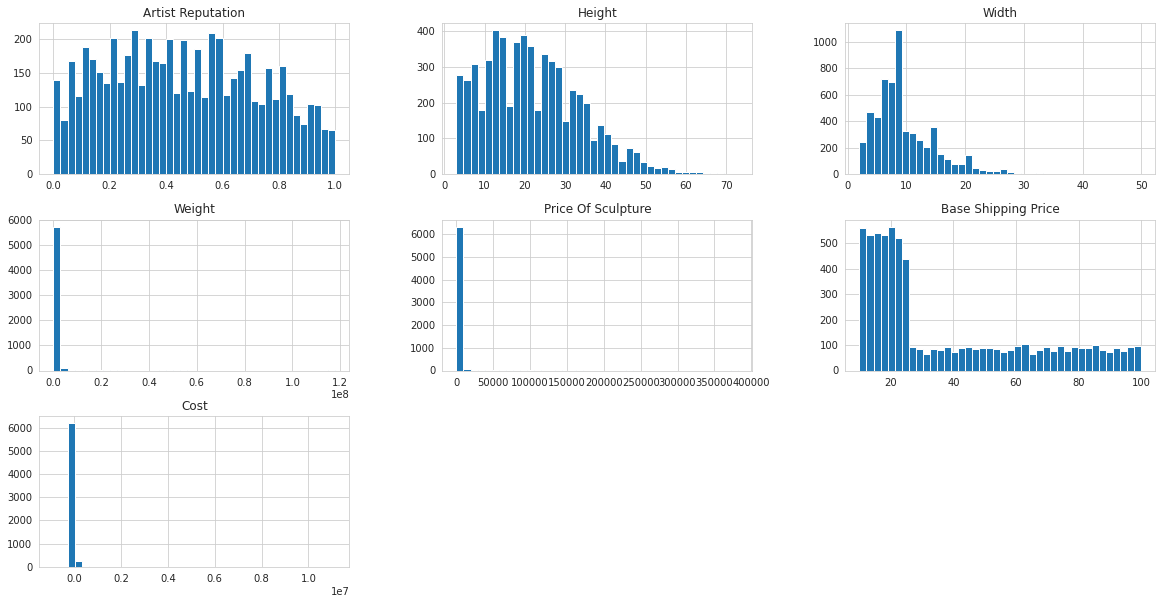

In [ ]:
df[atributos_numericos].hist(figsize=(20, 10), bins=40);

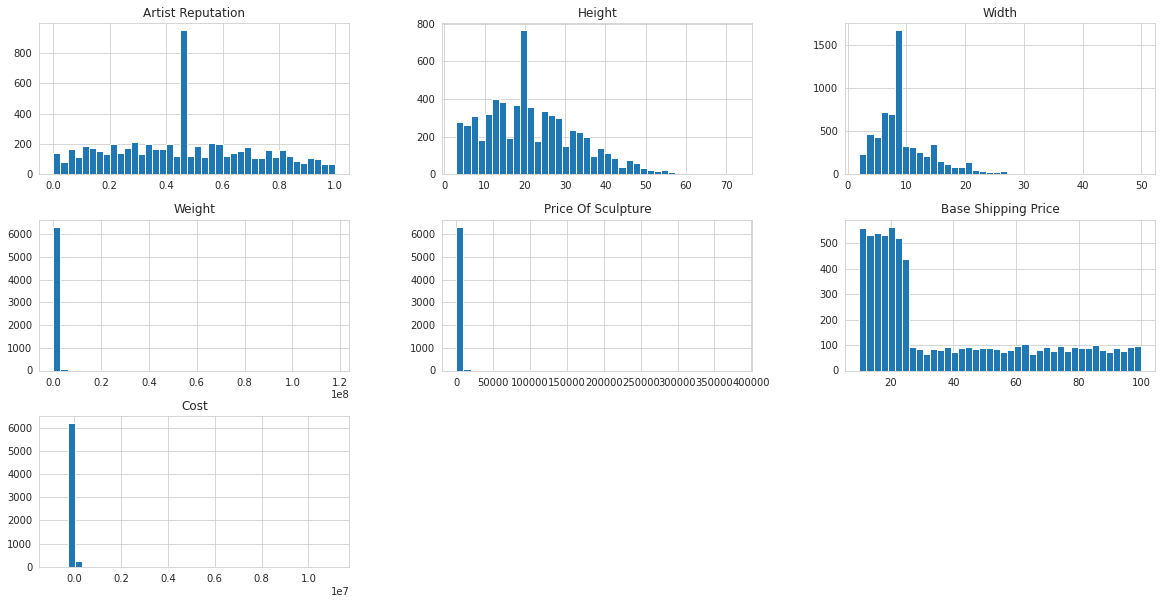

In [ ]:
df_EDA[atributos_numericos].hist(figsize=(20, 10), bins=40);


Artist Reputation
- Apresenta uma distribuição uniforme, como um pico centralizado, que foi criado quando os valores faltantes foram preenchidos com a mediana

Height
- Apresenta uma distribuição com calda à direita, também com o mesmo pico nas proximidades da mediana devido ao preenchidos dos dados faltantes

Width
- Apresenta uma distribuição com calda à direita, também com o mesmo pico nas proximidades da mediana devido ao preenchidos dos dados faltantes

Weight
- A média é bem maior que a mediana, o que indica a presença de uma calda
- Considerando os atributos With e Weight podemos chegar a conclusão que a maioria das esculturas tem valores distribuidos entre tamanho médio e pequeno

Price Of Sculpture

Base Shipping Price
- Esse atributo apresenta dois níveis de uma distribuião uniforme, o que dá impressão do mesmo ser representado por uma distribuição com calda à direita
- Esse formato de distribuição possivelmente significa que existe um grande conjunto de esculturas com "valores base de entrega" no mesmo patamar de preço, abaixo de $20, enquanto temos menos resgistros distribuidos ao longo da calda, representando esculturas que tem um valor agregado maior para entrega, devido a questões de logística

Cost
- Apresenta valores negativos que precisam ser entendidos


In [ ]:
# Teste de normalidade - Shapiro
for x in atributos_numericos:
    pvalor = stats.shapiro(df_EDA[x])[1]
    if (pvalor > 0.05):
        print(f'{x} segue distribuição normal, pois o p-valor igual a {pvalor:.2e}')
    else:
        print(f'{x} não segue distribuição normal, pois o p-valor igual a {pvalor:.2e}')

Artist Reputation não segue distribuição normal, pois o p-valor igual a 9.14e-32
Height não segue distribuição normal, pois o p-valor igual a 5.53e-36
Width não segue distribuição normal, pois o p-valor igual a 0.00e+00
Weight não segue distribuição normal, pois o p-valor igual a 0.00e+00
Price Of Sculpture não segue distribuição normal, pois o p-valor igual a 0.00e+00
Base Shipping Price não segue distribuição normal, pois o p-valor igual a 0.00e+00
Cost não segue distribuição normal, pois o p-valor igual a 0.00e+00


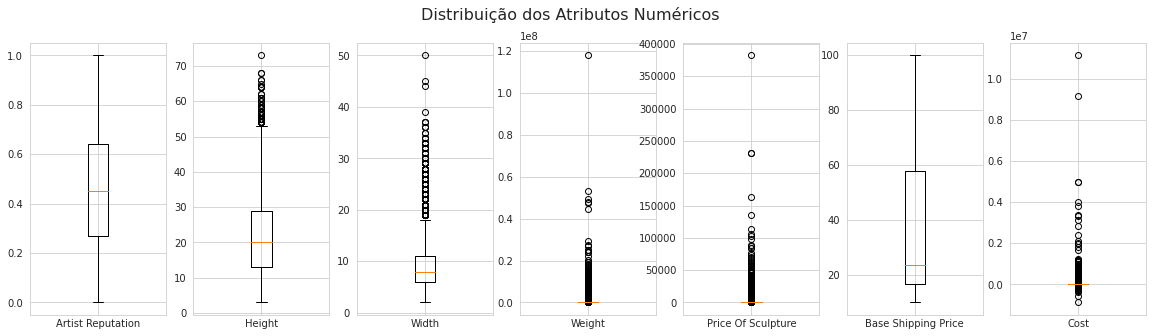

In [ ]:
fig,ax = plt.subplots(1,len(atributos_numericos),figsize = (20,5))

for i,val in enumerate(atributos_numericos):
  ax[i].boxplot(df_EDA[val])
  ax[i].set_xlabel(val)
  ax[i].tick_params(axis='x',which='both', bottom=False,top=False,labelbottom=False)

fig.suptitle('Distribuição dos Atributos Numéricos', fontsize=16);

#### Dados Categóricos

In [ ]:
atributos_categoricos = ['Artist Name','Material','International','Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location']

In [ ]:
df_EDA[atributos_categoricos].describe()

,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
count,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500
unique,6449,7,2,2,2,3,2,2,2,1660,1664,6500
top,John Brown,Brass,No,No,No,Roadways,No,Working Class,No,07/16/15,12/08/16,"New Brittanyhaven, DC 31921"
freq,4,1611,4294,4365,3916,3456,5461,4803,5365,12,12,1


Artist Name
- O que se observa nesse atributo é que ele quase não tem valores repedido, por se tratar de nome de artitas, o que sugere a desconsideração do mesmo nas análises.

Material
- No total são observados 7 materiais diferentes usados na criação do conjunto de esculturas

International
- Aproximadamente 66% das esculturas foram vendidas nacionalmente

Express Shipment
- Aproximadamente 32% das esculturas foram vendidas em "express (fast) mode"

Installation Included

Transport

Fragile

Customer Information

Remote Location

Scheduled Date

Delivery Date

Customer Location

### Análise Multivariada

#### Atributos Numéricos x Numéricos

Será checada a dependência entre os atributos numéricos através da matriz de correlação. Como o atributo alvo é categórico, está análise verificará apenas se existe correlação entre os preditores.

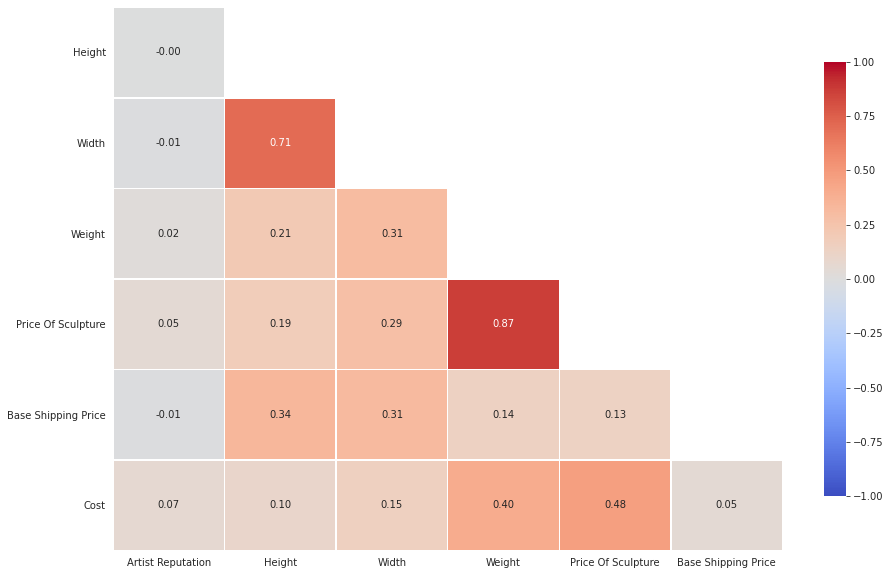

In [ ]:
df_corr = df_EDA[atributos_numericos].corr()
fig, ax = plt.subplots(figsize=(15, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8},linewidths=.5)
# yticks
plt.yticks(rotation=0)
plt.show()

Considerando apenas os atributos numérico, ao fazermos a matriz de correlação chegamos a conclusão que apenas 2 pares de atributos tem uma correlação consideralvemente forte:
- Width X Height
  > Pode ser justificado pelas características estruturais de uma escultura, na qual, quanto maior a altura escultura, maior é a base necessária para sustentar toda a estrutura.
- Price Of Sculpture X Weight
  > Pode ser justificado pelo preço atrelado à quantidade de material utilizada na construção da escultura.

Quando avaliamos a variável alvo da regressão, que realizaremos no final desse estudo, "Cost", percebemos que nenhum outro atributo apresenta uma correlação linear significante com a mesma.
Isso é um indício que talvez precisemos utilizar outros tipos de regressão, além da linear.

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

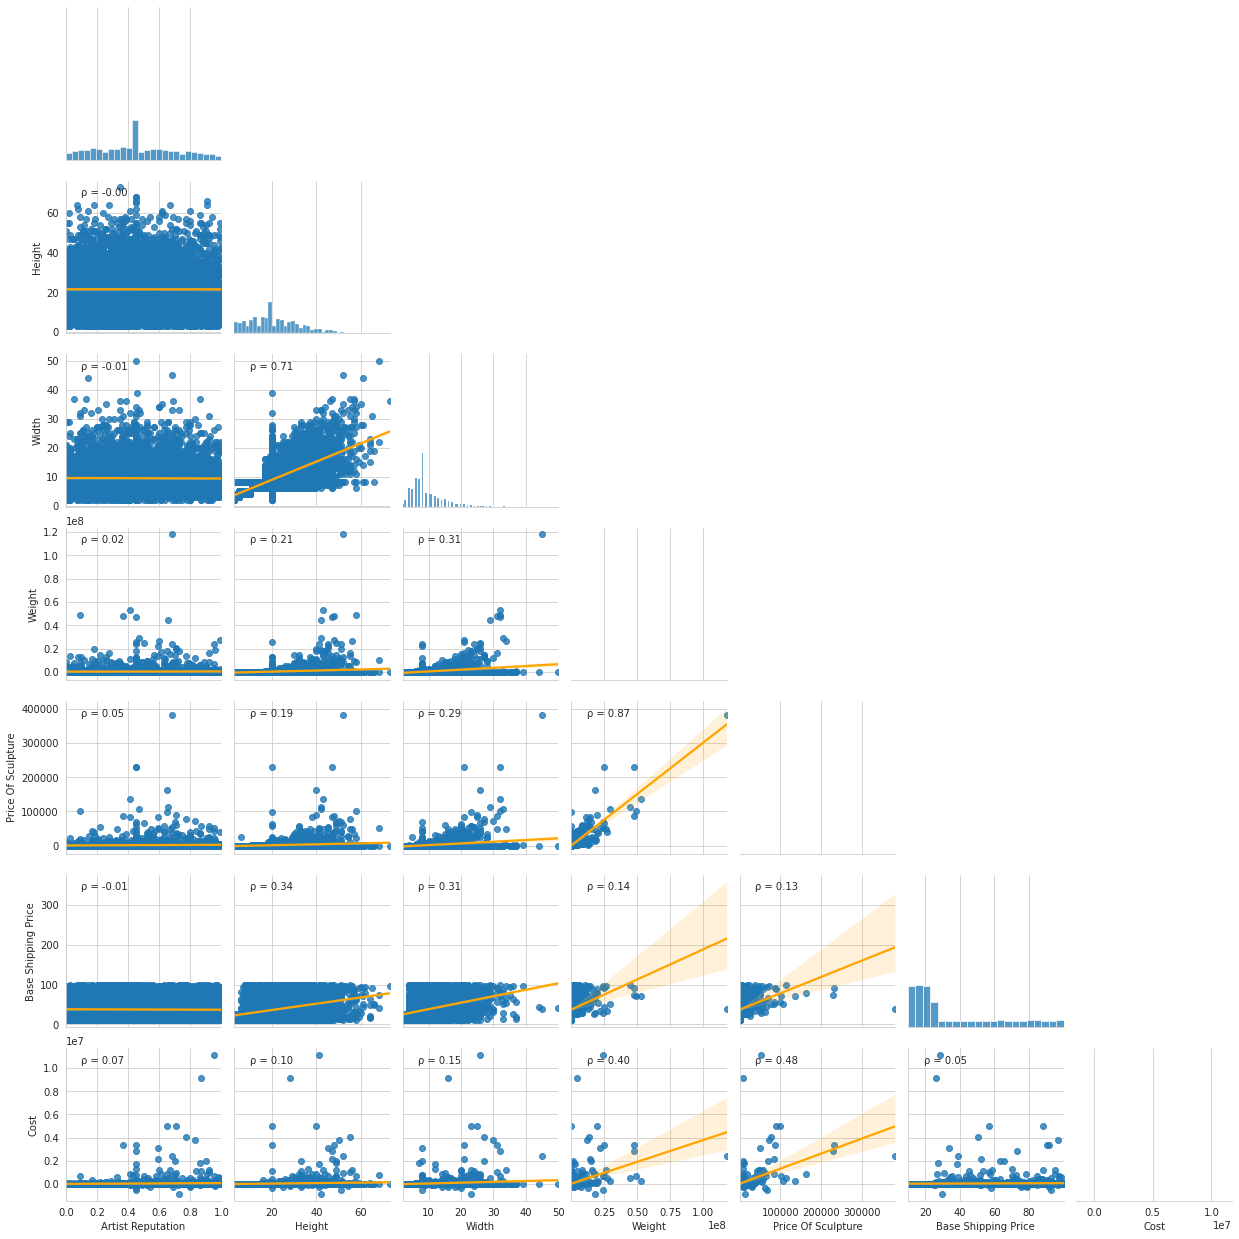

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_EDA[atributos_numericos], kind = "reg", corner = True, plot_kws={'line_kws':{'color':'orange'}}).map_lower(corrfunc);

> O gráfico acima traz as mesmas informações que o a matriz de correlação, presente na célula anterior, entretanto aqui podemos ver o cruzamento de cada atributo por meio de gráficos de dispersão, junto de suas respectivas linhas de regessão e coeficiente de Pearson.

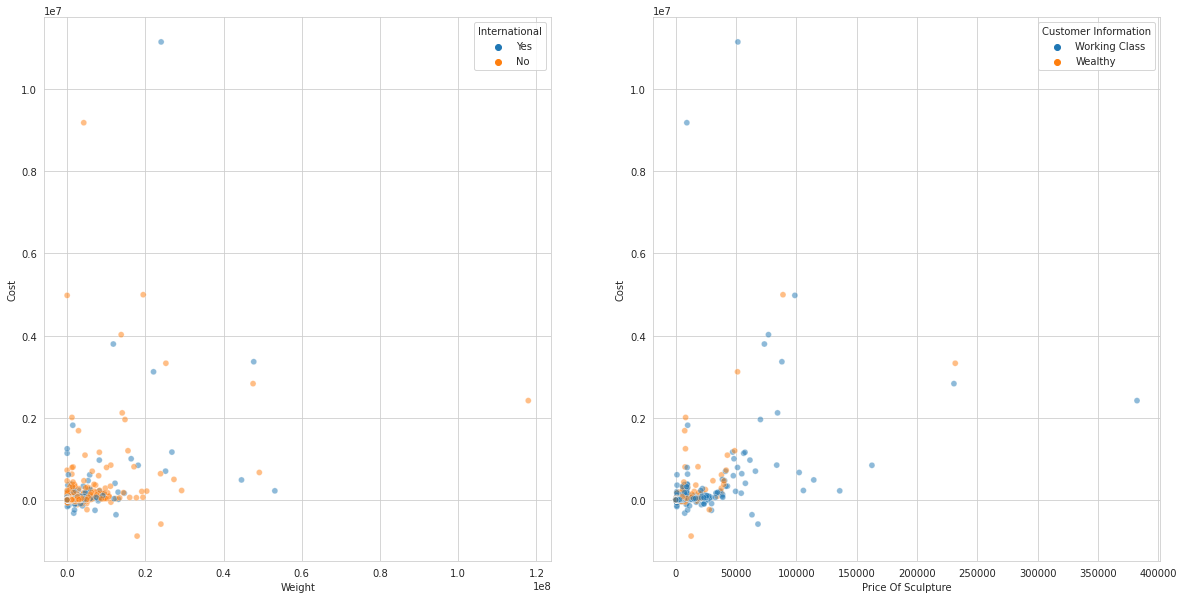

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

sns.scatterplot(x='Weight', y='Cost',
                hue='International',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax = ax[0]);

sns.scatterplot(x='Price Of Sculpture', y='Cost',
                hue='Customer Information',sizes=(10,80),alpha=0.5,
                data=df_EDA, ax=ax[1]);

Text(0.5, 1.0, ' Price Of Sculpture vs. Cost Plot')

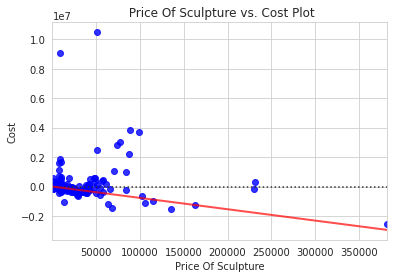

In [ ]:
# Gráfico de resíduos entre life_expectancy e schooling
ax_residual = sns.residplot(df_EDA['Price Of Sculpture'], df_EDA['Cost'], lowess=True, color="b", line_kws={'color': 'red', 'lw': 2, 'alpha': 0.7})
ax_residual.set_title(" Price Of Sculpture vs. Cost Plot")

In [ ]:
# Modelo de regressão com apenas uma variável independente
import scipy

model1 = scipy.stats.linregress(df_EDA['Price Of Sculpture'], df_EDA['Cost'])
print("linear function: y = " + str(round(model1.slope,3)) + "x + " + str(round(model1.intercept,3)))
print("R = " + str(round(model1.rvalue,3)))
print("R² = " + str(round(model1.rvalue**2,3)))
print("p value = " + str(round(model1.pvalue,3)))

linear function: y = 12.995x + 1643.997
R = 0.476
R² = 0.227
p value = 0.0


#### Atributos Categóricos x Numéricos

#### Atributos Categóricos x Categóricos

### Agrupamento

In [ ]:
scaler = MinMaxScaler()
array_scaler = scaler.fit_transform(df_EDA[atributos_numericos])
df_scaled = pd.DataFrame(array_scaler, columns=df_EDA[atributos_numericos].columns)
df_scaled.head()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,0.26,0.20,0.08,3.50e-05,2.85e-05,0.07,0.07
1,0.28,0.00,0.02,4.92e-07,1.00e-05,0.06,0.07
2,0.07,0.07,0.06,1.98e-06,5.13e-06,0.12,0.07
3,0.12,0.09,0.12,2.63e-05,7.35e-06,0.07,0.07
4,0.15,0.20,0.08,2.72e-06,4.71e-07,0.02,0.07


In [ ]:
pca = PCA(n_components=2)

principalDf = pd.DataFrame(data = pca.fit_transform(df_scaled) , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[0.09566573 0.06248531]
[0.49730688 0.32482243]


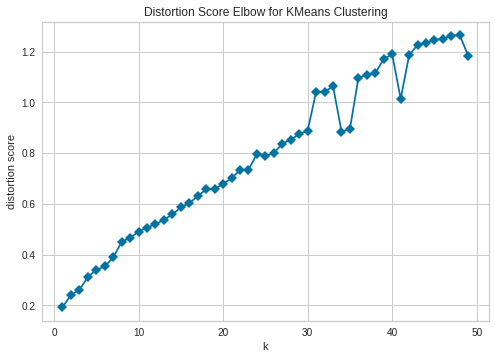

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(
    init='k-means++',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(1,50), metric='distortion', timings=False)

# Fit the data and visualize
visualizer.fit(df_scaled)
visualizer.poof()